# Find/Draw Letters

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import uuid

In [7]:
def findAndDrawContours(fileName) -> cv2.Mat:
    image: cv2.Mat = cv2.imread(fileName)
    answer = fileName[8:14]

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)[1]

    contour = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    boundClients = list()

    recImage = image.copy()
    if len(contour) <= 6 and len(contour) > 3:
        for c in contour:
            x, y, w, h = cv2.boundingRect(c)
            if w > h:
                amount = (math.floor(w/24))
                w = (math.ceil(w/amount))
                for i in range(amount):
                    cv2.rectangle(recImage, (x+(w*i), y), (x+w + (w*i), y+h),
                                  (255, 255, 0), 1)
                    boundClients.append([x+w, y, w, h])
            else:
                cv2.rectangle(recImage, (x, y), (x+w, y+h), (255, 255, 0), 1)
                boundClients.append([x, y, w, h])
        
    boundClients.sort(key=lambda x: x[0])
    
    if len(contour) == 6:
        for i in range(len(answer)):
            cropAndSave(answer[i], image=image, dim=boundClients[i])
        
    
    return image

def findContours(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)[1]

    contour = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
    boundClients = list()
    if len(contour) <= 6 and len(contour) > 3:
        for c in contour:
            x, y, w, h = cv2.boundingRect(c)
            if w > h:
                amount = (math.floor(w/24))
                w = (math.ceil(w/amount))
                for i in range(amount):
                    cv2.rectangle(image, (x+(w*i), y), (x+w + (w*i), y+h),
                                  (255, 255, 0), 1)
                    boundClients.append([x+(w*i), y, w, h])
            else:
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 0), 1)
                boundClients.append([x, y, w, h])
    boundClients.sort(key=lambda x: x[0])
    return boundClients

def cropAndSave(letter,image, dim):
    if not os.path.exists('alphabet/'+letter):
        os.mkdir('alphabet/'+letter, mode=0o777)
    
    newImg = image[dim[1]:dim[1] + dim[3], dim[0] : dim[0] + dim[2]]

    cv2.imwrite('alphabet/' + letter + "/"+str(uuid.uuid4()) + '.jpeg', newImg)

def crop(image, dim):
    return image[dim[1]:dim[1] + dim[3], dim[0]: dim[0] + dim[2]]


# Create the CNN Model

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Rescaling
from tensorflow.keras.utils import image_dataset_from_directory, load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow import expand_dims

In [4]:
trainingDS = image_dataset_from_directory(
    "alphabet", subset="training", image_size=(227, 227), validation_split=0.1, seed=1)

validationDS = image_dataset_from_directory(
    "alphabet", subset="validation", image_size=(227, 227), validation_split=0.1, seed=1)

letterNames = trainingDS.class_names


Found 1364 files belonging to 18 classes.
Using 1228 files for training.
Found 1364 files belonging to 18 classes.
Using 136 files for validation.


# ALEX CNN MODEL TRAINING

# **DO NOT RUN THE MODEL IS SAVED IN FOLDER**


In [5]:
#AlexNet CNN Model
model = Sequential([
    Rescaling(1./255, input_shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=4, padding='valid', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2,padding="valid"),
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid"),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(3, 3), strides=2, padding="valid"),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(letterNames), activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam", metrics=["accuracy"])

history = model.fit(trainingDS, validation_data=validationDS,epochs=10)

model.save("expectedModel.hdf5")


Epoch 1/10
39/39 [==============================] - 24s 595ms/step - loss: 2.8764 - accuracy: 0.0863 - val_loss: 2.8443 - val_accuracy: 0.0368
Epoch 2/10
39/39 [==============================] - 23s 591ms/step - loss: 2.8106 - accuracy: 0.1376 - val_loss: 2.0700 - val_accuracy: 0.3529
Epoch 3/10
39/39 [==============================] - 23s 581ms/step - loss: 0.9028 - accuracy: 0.7191 - val_loss: 0.2723 - val_accuracy: 0.9559
Epoch 4/10
39/39 [==============================] - 23s 581ms/step - loss: 0.1596 - accuracy: 0.9666 - val_loss: 0.2409 - val_accuracy: 0.9853
Epoch 5/10
39/39 [==============================] - 23s 583ms/step - loss: 0.0403 - accuracy: 0.9935 - val_loss: 0.2517 - val_accuracy: 0.9926
Epoch 6/10
39/39 [==============================] - 23s 588ms/step - loss: 0.0281 - accuracy: 0.9967 - val_loss: 0.2196 - val_accuracy: 0.9926
Epoch 7/10
39/39 [==============================] - 23s 586ms/step - loss: 0.0338 - accuracy: 0.9967 - val_loss: 0.1929 - val_accuracy: 0.9926

# Single Letter Test

1/1 [==============================] - 0s 129ms/step
This Letter is  J


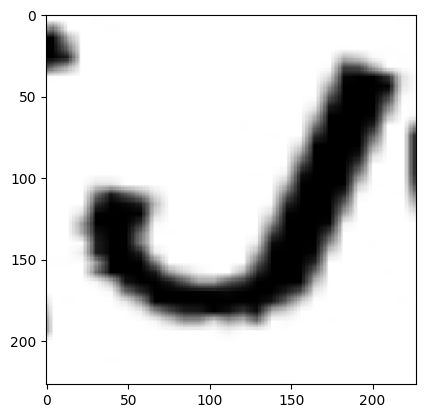

In [10]:
model = load_model("../expectedModel.hdf5")

img = load_img("test.PNG",
               target_size=(227, 227))

img_array = img_to_array(img)
img_array = expand_dims(img_array, 0)
predictions = model.predict(img_array)[0]
plt.imshow(img)

print("This Letter is ", letterNames[np.argmax(predictions)])


# Full Captcha Implementation


https://images-na.ssl-images-amazon.com/captcha/qmdddjhv/Captcha_zlromtinee.jpg
1/1 [==============================] - 0s 32ms/step
['C', 'X', 'R', 'Y', 'Y', 'E']


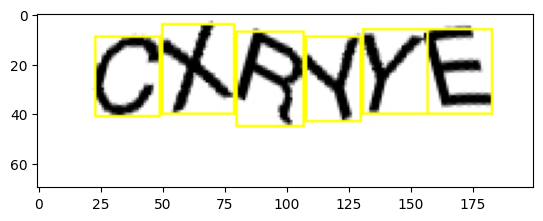

In [14]:
import http.client
from PIL import Image

def getCaptchaPage():
    conn = http.client.HTTPSConnection("www.amazon.com")
    conn.request("GET", "/errors/validateCaptcha")
    res = conn.getresponse()
    data = res.read()
    body = data.decode("utf-8")
    item = body[body.find(
        'https://images-na.ssl-images-amazon.com/captcha'):]
    item = item[:item.find('"')]
    return item

def getCaptchaImage(url):
    if len(url) == 0:
        return ""
    path = url[url.find("/captcha"):]
    conn = http.client.HTTPSConnection("images-na.ssl-images-amazon.com")
    conn.request("GET", path)
    res = conn.getresponse()
    data = res.read()
    
    image = cv2.imdecode(np.frombuffer(data, np.uint8), cv2.IMREAD_COLOR)
    return image


def predict(img):
    image = Image.fromarray(img)
    image = image.resize((227, 227))
    img_array = img_to_array(image)
    img_array = expand_dims(img_array, 0)
    predictions = model.predict(img_array)[0]
    return letterNames[np.argmax(predictions)]

def solve():
    url = getCaptchaPage()
    print(url)
    image = getCaptchaImage(url)
    basicImage = image.copy()

    contours = findContours(image=image)
    plt.imshow(image)

    finalAnswer = []
    for contour in contours:
        newImage = crop(basicImage,contour)
        prediction = predict(newImage)
        finalAnswer.append(prediction)

    print(finalAnswer)

solve()
    